# Geopetro

In [7]:
from gallery import *

Podemos carregar um modelo da galeria diretamente através de um arquivo de parâmetros. No repositório estão incluídos os seguintes modelos:
  * bola
  * bola com base pequena
  * bola grande
  * bola sem base
  * marmousi
  * petro

Cada um desses modelos tem um arquivo csv detalhando seus parâmetros.

Por exemplo, o modelo bola dispõe dos seguintes parâmetros:

In [9]:
data_bola = read_data('modelData/data_bola.csv')
data_bola

{'water_depth': 32.0,
 'physical_origin': array([0., 0.]),
 'base_physical_size': array([240., 240.]),
 'trange': array([0., 3.]),
 'nSources': 1.0,
 'source_depth': 500.0,
 'base_pixels': array([241, 241]),
 'base_pixel_scale': array([1., 1.]),
 'factor': 0.2,
 'file_vel': 'modelData/bola/vel_circulo.bin',
 'file_vel0': 'modelData/bola/vp_homogeneous_expand.bin',
 'transpose_data': 1.0,
 'physical_dimensions_units': ('m', 'm'),
 'base_pixel_units': ('m', 'm'),
 'frequency': 10.0,
 'type_data': numpy.float32}

Com os parâmetros do modelo definidos, podemos usar o pysit para gerar o mesh, fazer resampling (se o parâmetro factor for menor que 1), configurar o solver, gerar dados sísmicos, etc.

In [11]:
res = get_model_from_dict(data_bola)


Setting up shots...
Setting up shots... 0.019369604997336864
Configuring the wave solver...
Configuring the wave solver... 0.0001035089953802526
Data generation...
Generating data...
Shot 0: 1.2572242930182256
Data generation: 1.2573771476745605s
Data generation: 1.2573771476745605s/shot
Saving data...
Data saving: 0.0029189586639404297s
Data saving: 0.0029189586639404297s/shot


No caso acima obtivemos o modelo diretamente a partir do arquivo de parâmetros. Uma segunda opção é carregar o arquivo e alterar algum parâmetro de forma manual. 

Por exemplo, podemos querer obter o modelo da bola para diferentes fatores de resampling. Vamos usar os seguintes valores: 0.1, 0.2, 0.3, 0.4, 0.5.


Getting model using a resampling factor of 0.1
Setting up shots...
Setting up shots... 0.008861619018716738
Configuring the wave solver...
Configuring the wave solver... 0.00011552200885489583
Data generation...
Generating data...
Shot 0: 0.4562119329930283
Data generation: 0.4562873840332031s
Data generation: 0.4562873840332031s/shot
Saving data...
Data saving: 0.0013806819915771484s
Data saving: 0.0013806819915771484s/shot

Getting model using a resampling factor of 0.25
Setting up shots...
Setting up shots... 0.02040294898324646
Configuring the wave solver...
Configuring the wave solver... 0.00010874701547436416
Data generation...
Generating data...
Shot 0: 1.9885760890028905
Data generation: 1.9886434078216553s
Data generation: 1.9886434078216553s/shot
Saving data...
Data saving: 0.0030884742736816406s
Data saving: 0.0030884742736816406s/shot

Getting model using a resampling factor of 0.33
Setting up shots...
Setting up shots... 0.027822286006994545
Configuring the wave solver...


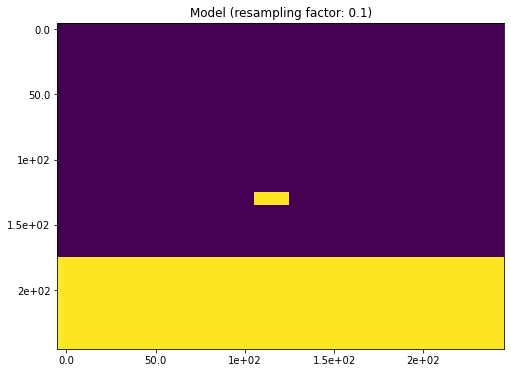

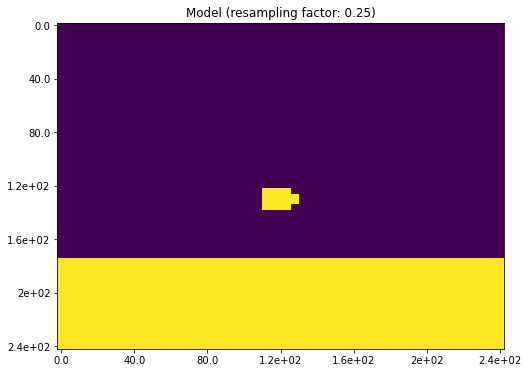

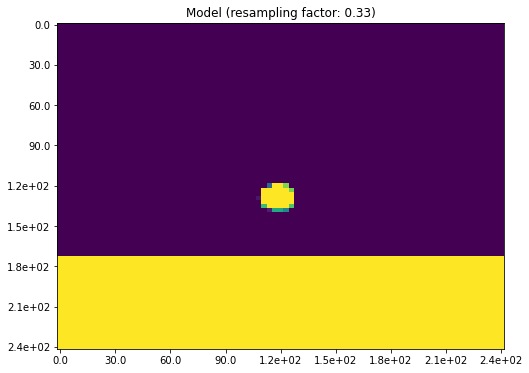

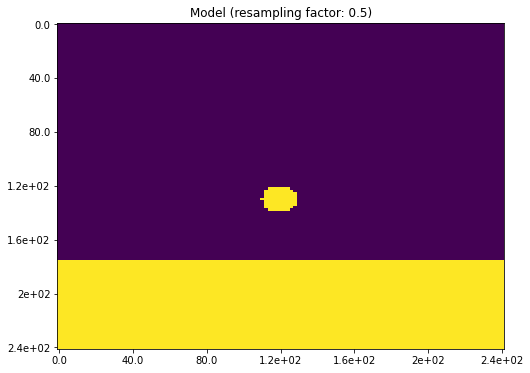

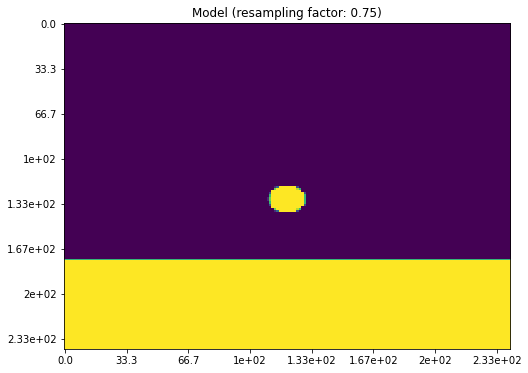

In [12]:
resampling_factors = [0.1, 0.25, 0.33, 0.5, 0.75]
data_bola = read_data('modelData/data_bola.csv')
res = {}
for r in resampling_factors:
    data_bola['factor'] = r
    print(f'Getting model using a resampling factor of {r}')
    res[r] = get_model_from_dict(data_bola, plot=True)
    print()



Como os parâmetros são definidos em um dicionário, também é possível definir um modelo inteiramente de forma manual.

Setting up shots...
Setting up shots... 0.07832026499090716
Configuring the wave solver...
Configuring the wave solver... 0.00010592999751679599
Data generation...
Generating data...
Shot 0: 1.9069433709955774
Data generation: 1.9070498943328857s
Data generation: 1.9070498943328857s/shot
Saving data...
Data saving: 0.006999492645263672s
Data saving: 0.006999492645263672s/shot


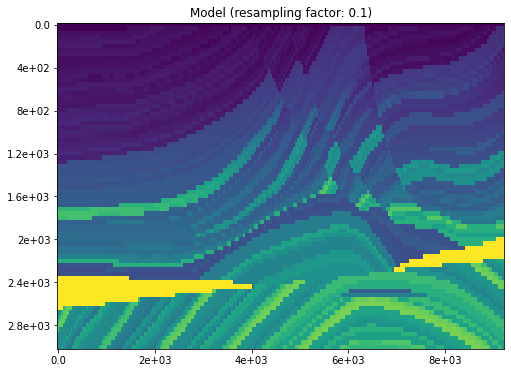

In [13]:
dict_data = {}
dict_data['water_depth'] = 32.0
dict_data['physical_origin'] =  np.array([0.0, 0.0])
dict_data['base_physical_size'] = np.array([9200.0, 3000.0])
dict_data['trange'] = (0.0, 3.0)
dict_data['nSources'] = 1
dict_data['source_depth'] = 500
dict_data['base_pixels'] = np.array([2301, 751])
dict_data['base_pixel_scale'] = np.array([4.0, 4.0])
dict_data['factor'] = 0.1
dict_data['file_vel'] = 'modelData/marmousi/velocity_rev1.segy'
dict_data['file_vel0'] = 'modelData/marmousi/v0.npy'
dict_data['transpose_data'] = 1
res = get_model_from_dict(dict_data, plot=True)